# Dataset Source

The ling-spam dataset is collected from https://www.kaggle.com/mandygu/lingspam-dataset/notebooks

# Imports & Installations

In [2]:
!pip install twython pandas nltk matplotlib seaborn sklearn

     |████████████████████████████████| 9.9 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 32.9 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 85.6 MB/s eta 0:00:01███████▉| 10.2 MB 85.6 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 59.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 68.3 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 55.3 MB/s eta 0:00:01��▏    | 13.0 MB 55.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 35.0 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 303 kB 65.3 MB/s eta 0:00:01
     |████████████████████████████████| 720 kB 50.4 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 3.2 MB/s  eta 0:00:01
     |████████████████████████████████| 27.4 MB 41.1 MB/s eta 0:00:01 |█████████████████               | 14.5 MB 41.1 MB/s eta 0:00:01
     |████████████████████████

In [3]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from collections import Counter
import string
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')
import re
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Collecting Dataset

The reason of getting the dataset from my github repository is that the original csv is hosted at Kaggle which requires account signup to access the dataset thus referaining open access to the dataset. Therefore, github's public repository will make it easier for us to fetch the dataset without needing any permission.

In [4]:
!wget "http://raw.githubusercontent.com/alihussainia/Email-Spam-Classification-Project/master/messages.csv.zip"

--2021-04-04 23:28:33--  http://raw.githubusercontent.com/alihussainia/Email-Spam-Classification-Project/master/messages.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/alihussainia/Email-Spam-Classification-Project/master/messages.csv.zip [following]
--2021-04-04 23:28:34--  https://raw.githubusercontent.com/alihussainia/Email-Spam-Classification-Project/master/messages.csv.zip
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3272271 (3.1M) [application/zip]
Saving to: ‘messages.csv.zip’

messages.csv.zip    100%[===================>]   3.12M  --.-KB/s    in 0.07s   

2021-04-04 23:28:34 (42.5

In [5]:
# Extracting dataset
!unzip messages.csv.zip

Archive:  messages.csv.zip
  inflating: messages.csv            


#Understanding our dataset

In [6]:
# Loading dataset as a Pandas DataFrame
dataset = pd.read_csv('messages.csv')

In [7]:
dataset.head(10)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


# Data Transformation

### Converting Messages to Lower Case

In [8]:
# converting all messages to lower case

dataset['message'] = dataset['message'].str.lower()

### Cleaning Data

We are starting with null value check

In [9]:
# Cleaning Data
# checing null values 
dataset.isnull().sum()

subject    62
message     0
label       0
dtype: int64

From here we can observe that data is missing in the subject column therefore, we are filling the null values with mode values and since, mode returns a Series, so you still need to access the row you want before replacing NaN values in your DataFrame



In [10]:
dataset.fillna(dataset['subject'].mode().values[0],inplace=True)

In [11]:
# let's once again 
dataset.isnull().sum()

subject    0
message    0
label      0
dtype: int64

Now it's looking perfect and move on to next step's .

In [12]:
df = dataset.copy()

To get clarity about mail let's merge both subject and message .

In [13]:
df['sub_mssg']=df['subject']+df['message']
df.head()

,subject,message,label,sub_mssg
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...


In [14]:
df['sub_mssg'].describe()

count                                                  2893
unique                                                 2876
top       re := 20 the virtual girlfriend and virtual bo...
freq                                                      4
Name: sub_mssg, dtype: object

Adding lenght columns which represents original length of the subject+message

In [15]:
df['length']=df['sub_mssg'].apply(len)
df.head()

,subject,message,label,sub_mssg,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


dropping un-necessary features 

In [16]:
df.drop('subject',axis=1,inplace=True)

### Preprocessing Email Messages

In [17]:
def decontact(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [18]:
#REPLACING NUMBERS FROM Digits to Words
df['sub_mssg']=df['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers')
df['sub_mssg'][0]

"job posting - apple-iss research centercontent - length : numbers apple-iss research center a us $ numbers million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statis

In [19]:
#CONVRTING EVERYTHING TO LOWERCASE
df['sub_mssg']=df['sub_mssg'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df['sub_mssg']=df['sub_mssg'].str.replace(r'\n'," ") 
# REPLACING EMAIL IDs BY 'MAILID'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df['sub_mssg']=df['sub_mssg'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df['sub_mssg']=df['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [20]:
#CONVRTING EVERYTHING TO LOWERCASE
df['message']=df['message'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df['message']=df['message'].str.replace(r'\n'," ") 
# REPLACING EMAIL IDs BY 'MAILID'
df['message']=df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df['message']=df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df['message']=df['message'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df['message']=df['message'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df['message']=df['message'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df['message']=df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df['message']=df['message'].str.replace(r"[^a-zA-Z0-9]+", " ")

**Removing stopwords**


In [21]:
# # to check the nltk stopwords list
# import nltk
# from nltk.corpus import stopwords
# print(stopwords.words('english'))

# removing stopwords 
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['Cleaned_Text'] = df['sub_mssg'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dropping redundant features

In [22]:
df.drop('message',axis=1,inplace=True)

In [23]:
df.drop('sub_mssg',axis=1,inplace=True)

In [24]:
# checking null values in df
df.isnull().sum()

label           0
length          0
Cleaned_Text    0
dtype: int64

In [25]:
df['lgth_clean']=df['Cleaned_Text'].apply(len)
df.head()

,label,length,Cleaned_Text,lgth_clean
0,0,2895,job posting apple iss research centercontent l...,2108
1,0,1816,sociolinguisticslang classification grimes jos...,1506
2,0,1485,query letter frequencies text identificationi ...,1150
3,0,328,riska colleague researching differing degrees ...,216
4,0,1070,request book informationearlier morning phone ...,653


Dropping counts to visualize dataset

In [26]:
df.drop('length',axis=1,inplace=True) # original subject+message len
df.drop('lgth_clean',axis=1,inplace=True) # after transformation sub+msg len

# Shape of the Dataset

In [27]:
df.shape

(2893, 2)

# First Ten Values of the Dataset

In [28]:
df.head(10)

,label,Cleaned_Text
0,0,job posting apple iss research centercontent l...
1,0,sociolinguisticslang classification grimes jos...
2,0,query letter frequencies text identificationi ...
3,0,riska colleague researching differing degrees ...
4,0,request book informationearlier morning phone ...
5,0,call abstracts optimality syntactic theorycont...
6,0,scandinavian linguisticsm scandinavian linguis...
7,0,call papers linguistics session mlacall papers...
8,0,foreign language commercialscontent length num...
9,0,fulbright announcement please post disseminate...


# Last Ten Values of the Dataset

In [29]:
df.tail(10)

,label,Cleaned_Text
2883,0,evolvable hardware gppaper available post scri...
2884,1,work calsvxtnhello thanks stopping taken many ...
2885,0,british vs american sgriffin bacal internet ma...
2886,1,fanny recommending nekdear sir madam spam mess...
2887,1,win Money numbersusd cruise raquel casino inc ...
2888,1,love profile ysuolvpvhello thanks stopping tak...
2889,1,asked join kiddinthe list owner kiddin invited...
2890,0,anglicization composers namesjudging return po...
2891,0,numbers numbers comparative method n ary compa...
2892,0,american english australiahello working thesis...


# Training Model

In [30]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.pipeline import Pipeline
from cf_matrix import make_confusion_matrix
sns.set_context('talk')

# Logistic Regression

In [31]:
tvec = TfidfVectorizer()
lr = LogisticRegression(solver = "lbfgs")

In [32]:
X = df.Cleaned_Text
Y = df.label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 225,stratify=Y)

In [33]:
model = Pipeline([('vectorizer',tvec),('classifier',lr)])

#Fit the model
model.fit(X_train,Y_train)

#Get the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

lr_cf_matrix = confusion_matrix(y_pred,Y_test)
print(lr_cf_matrix)

[[242   8]
 [  0  40]]


In [34]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.9724137931034482
Precision :  0.9770114942528735
Recall :  0.9724137931034482


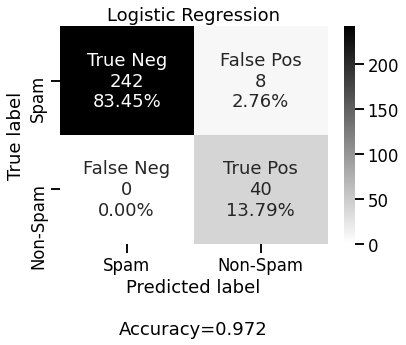

In [35]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Spam', 'Non-Spam']
make_confusion_matrix(lr_cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                     title='Logistic Regression')

# KNeighbors Classifier

In [36]:
knc = KNeighborsClassifier()
model_1 = Pipeline([('vectorizer',tvec),('classifier',knc)])
model_1.fit(X_train,Y_train)


y_pred = model_1.predict(X_test)

kn_cf_matrix = confusion_matrix(y_pred,Y_test)
print(kn_cf_matrix)

[[231   2]
 [ 11  46]]


In [37]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.9551724137931035
Precision :  0.9552899686520375
Recall :  0.9551724137931035


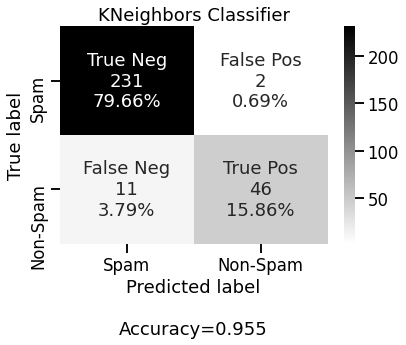

In [38]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Spam', 'Non-Spam']
make_confusion_matrix(kn_cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                     title='KNeighbors Classifier')

# Ada Boost Classifier

In [39]:
abc = AdaBoostClassifier()
model_3 = Pipeline([('vectorizer',tvec),('classifier',abc)])
model_3.fit(X_train,Y_train)


y_pred = model_3.predict(X_test)

ada_cf_matrix = confusion_matrix(y_pred,Y_test)
print(ada_cf_matrix)

[[241   3]
 [  1  45]]


In [40]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.9862068965517241
Precision :  0.9866094328868624
Recall :  0.9862068965517241


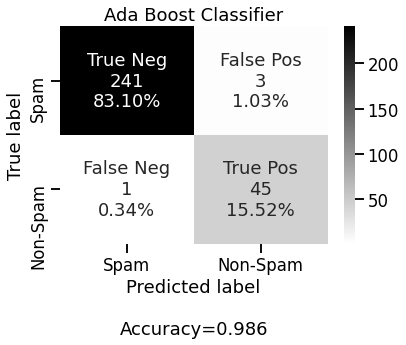

In [41]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Spam', 'Non-Spam']
make_confusion_matrix(ada_cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                     title='Ada Boost Classifier')

# Naive Bayes

In [42]:
mnb = MultinomialNB()
model_5 = Pipeline([('vectorizer',tvec),('classifier',mnb)])
model_5.fit(X_train,Y_train)


y_pred = model_5.predict(X_test)

nb_cf_matrix = confusion_matrix(y_pred,Y_test)
print(nb_cf_matrix)

[[242  37]
 [  0  11]]


In [43]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.8724137931034482
Precision :  0.9707614942528735
Recall :  0.8724137931034482


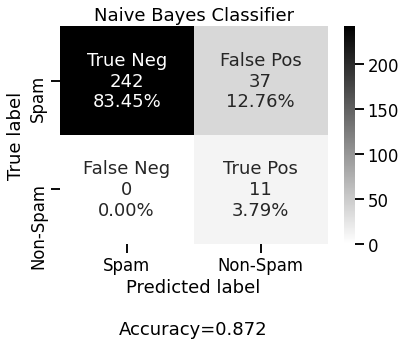

In [44]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Spam', 'Non-Spam']
make_confusion_matrix(nb_cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                     title='Naive Bayes Classifier')

# Gradient Boosting Classifier

In [45]:
gbc = GradientBoostingClassifier()
model_6= Pipeline([('vectorizer',tvec),('classifier',gbc)])
model_6.fit(X_train,Y_train)


y_pred = model_6.predict(X_test)
gb_cf_matrix = confusion_matrix(y_pred,Y_test)
print(gb_cf_matrix)

[[241   8]
 [  1  40]]


In [46]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.9689655172413794
Precision :  0.9728887622304552
Recall :  0.9689655172413794


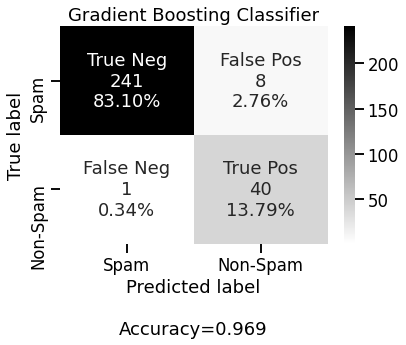

In [47]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Spam', 'Non-Spam']
make_confusion_matrix(gb_cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                     title='Gradient Boosting Classifier')

# Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(random_state=42)
model_7 = Pipeline([('vectorizer',tvec),('classifier',rfc)])

model_7.fit(X_train,Y_train)

y_pred = model_7.predict(X_test)
rf_cf_matrix = confusion_matrix(y_pred,Y_test)
print(rf_cf_matrix)

[[242   5]
 [  0  43]]


In [49]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.9827586206896551
Precision :  0.9845545977011494
Recall :  0.9827586206896551


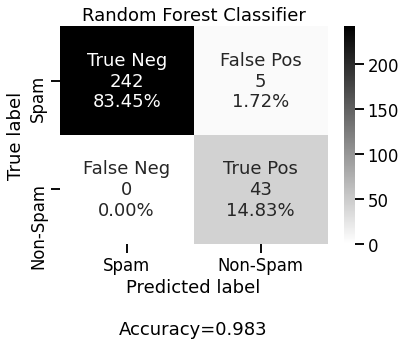

In [50]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Spam', 'Non-Spam']
make_confusion_matrix(rf_cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                     title='Random Forest Classifier')

# Saving the Pipeline

In [51]:
from joblib import dump
dump(model_7, 'spam_classifier.joblib')

['spam_classifier.joblib']

# Predicting

Here 0 represents Spam and 1 respresents Non-Spam

In [52]:
# Defining Prediction Function
def result():
    text = input().lower()
    if model_7.predict([text])[0] == 0:
        result='Result is Spam'
    else:
        result='Result is Non-Spam'
    return result

In [ ]:
# Spam Text
# your microsoft account has been compromised ,you must update before or else your account going to close click to update

In [53]:
result()

your microsoft account has been compromised ,you must update before or else your account going to close click to update


'Result is Spam'

In [ ]:
# Non-Spam Text
# Today we want to inform you that the application period for free Google Scholarships in Data Analytics is now open! Please apply by March 30th, 2021 via https://www.coursera.org/professional-certificates/google-data-analytics

In [54]:
result()

Today we want to inform you that the application period for free Google Scholarships in Data Analytics is now open! Please apply by March 30th, 2021 via https://www.coursera.org/professional-certificates/google-data-analytics


'Result is Non-Spam'